In [36]:
import pandas as pd
import sklearn 
import numpy as np



In [37]:
Loan = pd.read_csv('Loan.csv')

In [38]:
Loan.head(2)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0


In [39]:
Loan.shape

(20000, 36)

In [40]:
Loan.iloc[0]

ApplicationDate               2018-01-01
Age                                   45
AnnualIncome                       39948
CreditScore                          617
EmploymentStatus                Employed
EducationLevel                    Master
Experience                            22
LoanAmount                         13152
LoanDuration                          48
MaritalStatus                    Married
NumberOfDependents                     2
HomeOwnershipStatus                  Own
MonthlyDebtPayments                  183
CreditCardUtilizationRate       0.354418
NumberOfOpenCreditLines                1
NumberOfCreditInquiries                2
DebtToIncomeRatio               0.358336
BankruptcyHistory                      0
LoanPurpose                         Home
PreviousLoanDefaults                   0
PaymentHistory                        29
LengthOfCreditHistory                  9
SavingsAccountBalance               7632
CheckingAccountBalance              1202
TotalAssets     

In [41]:
input_features = [
    'AnnualIncome', 'MonthlyIncome', 'EmploymentStatus', 'EducationLevel', 'JobTenure',
    'LoanAmount', 'LoanDuration', 'MonthlyLoanPayment', 'MonthlyDebtPayments',
    'DebtToIncomeRatio', 'TotalDebtToIncomeRatio',
    'CreditScore', 'CreditCardUtilizationRate', 'PaymentHistory', 'LengthOfCreditHistory',
    'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'BankruptcyHistory', 'PreviousLoanDefaults',
    'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth',
    'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'UtilityBillsPaymentHistory'
]


In [42]:
print(input_features)

['AnnualIncome', 'MonthlyIncome', 'EmploymentStatus', 'EducationLevel', 'JobTenure', 'LoanAmount', 'LoanDuration', 'MonthlyLoanPayment', 'MonthlyDebtPayments', 'DebtToIncomeRatio', 'TotalDebtToIncomeRatio', 'CreditScore', 'CreditCardUtilizationRate', 'PaymentHistory', 'LengthOfCreditHistory', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'BankruptcyHistory', 'PreviousLoanDefaults', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'UtilityBillsPaymentHistory']


In [43]:
loan_features_df = Loan[input_features].copy()
loan_features_df.to_csv("Loan_SelectedFeatures.csv", index=False)


In [44]:
credit_worthy=pd.read_csv('Loan_SelectedFeatures.csv')

In [45]:
credit_worthy

,AnnualIncome,MonthlyIncome,EmploymentStatus,EducationLevel,JobTenure,LoanAmount,LoanDuration,MonthlyLoanPayment,MonthlyDebtPayments,DebtToIncomeRatio,...,PreviousLoanDefaults,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,NetWorth,MaritalStatus,HomeOwnershipStatus,LoanPurpose,UtilityBillsPaymentHistory
0,39948,3329.000000,Employed,Master,11,13152,48,419.805992,183,0.358336,...,0,7632,1202,146111,19183,126928,Married,Own,Home,0.724972
1,39709,3309.083333,Employed,Associate,3,26045,48,794.054238,496,0.330274,...,0,4627,3460,53204,9595,43609,Single,Mortgage,Debt Consolidation,0.935132
2,40724,3393.666667,Employed,Bachelor,6,17627,36,666.406688,902,0.244729,...,0,886,895,25176,128874,5205,Married,Rent,Education,0.872241
3,69084,5757.000000,Employed,High School,5,37898,96,1047.506980,755,0.436244,...,0,1675,1217,104822,5370,99452,Single,Mortgage,Home,0.896155
4,103264,8605.333333,Employed,Associate,5,9184,36,330.179140,274,0.078884,...,0,1555,4981,244305,17286,227019,Married,Mortgage,Debt Consolidation,0.941369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,2515.000000,Employed,High School,1,24521,36,905.767712,673,0.468077,...,0,235,3429,80969,25642,55327,Married,Rent,Auto,0.826217
19996,49246,4103.833333,Employed,Associate,3,25818,36,958.395633,414,0.317372,...,0,6910,183,69571,5569,64002,Married,Rent,Debt Consolidation,0.816618
19997,48958,4079.833333,Employed,Bachelor,3,37033,72,945.427454,512,0.023014,...,0,2175,746,108316,4653,103663,Married,Mortgage,Home,0.887216
19998,41025,3418.750000,Employed,High School,5,14760,72,411.168284,986,0.534517,...,0,3037,260,22085,11485,10600,Married,Own,Debt Consolidation,0.843787


In [46]:
credit_worthy.isnull().sum()
# For example, let's say RiskScore > 50 means creditworthy
credit_worthy['Creditworthy'] = (Loan['RiskScore'] > 50).astype(int)


In [47]:
credit_worthy.head()

,AnnualIncome,MonthlyIncome,EmploymentStatus,EducationLevel,JobTenure,LoanAmount,LoanDuration,MonthlyLoanPayment,MonthlyDebtPayments,DebtToIncomeRatio,...,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,NetWorth,MaritalStatus,HomeOwnershipStatus,LoanPurpose,UtilityBillsPaymentHistory,Creditworthy
0,39948,3329.000000,Employed,Master,11,13152,48,419.805992,183,0.358336,...,7632,1202,146111,19183,126928,Married,Own,Home,0.724972,0
1,39709,3309.083333,Employed,Associate,3,26045,48,794.054238,496,0.330274,...,4627,3460,53204,9595,43609,Single,Mortgage,Debt Consolidation,0.935132,1
2,40724,3393.666667,Employed,Bachelor,6,17627,36,666.406688,902,0.244729,...,886,895,25176,128874,5205,Married,Rent,Education,0.872241,1
3,69084,5757.000000,Employed,High School,5,37898,96,1047.506980,755,0.436244,...,1675,1217,104822,5370,99452,Single,Mortgage,Home,0.896155,1
4,103264,8605.333333,Employed,Associate,5,9184,36,330.179140,274,0.078884,...,1555,4981,244305,17286,227019,Married,Mortgage,Debt Consolidation,0.941369,0


In [48]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
le = LabelEncoder()

for col in cat_cols:
    credit_worthy[col] = le.fit_transform(credit_worthy[col])


In [58]:
credit_worthy.head(4)

,AnnualIncome,MonthlyIncome,EmploymentStatus,EducationLevel,JobTenure,LoanAmount,LoanDuration,MonthlyLoanPayment,MonthlyDebtPayments,DebtToIncomeRatio,...,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,NetWorth,MaritalStatus,HomeOwnershipStatus,LoanPurpose,UtilityBillsPaymentHistory,Creditworthy
0,39948,3329.000000,0,4,11,13152,48,419.805992,183,0.358336,...,7632,1202,146111,19183,126928,1,2,3,0.724972,0
1,39709,3309.083333,0,0,3,26045,48,794.054238,496,0.330274,...,4627,3460,53204,9595,43609,2,0,1,0.935132,1
2,40724,3393.666667,0,1,6,17627,36,666.406688,902,0.244729,...,886,895,25176,128874,5205,1,3,2,0.872241,1
3,69084,5757.000000,0,3,5,37898,96,1047.506980,755,0.436244,...,1675,1217,104822,5370,99452,2,0,3,0.896155,1


In [50]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = credit_worthy.drop(['Creditworthy'], axis=1)
y = credit_worthy['Creditworthy']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# X_train
# X_test

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Train model
classification_Model = RandomForestClassifier()
classification_Model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict and evaluate
y_pred = classification_Model.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1791
           1       0.91      0.93      0.92      2209

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000

ROC-AUC: 0.9054900527485272


In [70]:
# trying output
classification_Model.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1], shape=(4000,))

C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


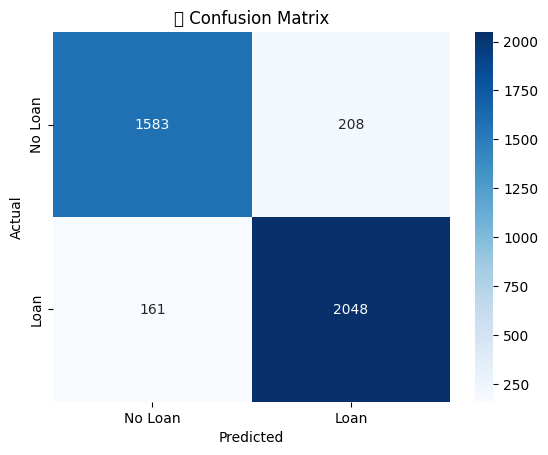

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('📊 Confusion Matrix')
plt.show()

***True Positive (TP = 2048): Model correctly predicted Loan when the actual was Loan.***
***-True Negative (TN = 1583): Model correctly predicted No Loan when the actual was No Loan.***
***False Positive (FP = 208): Model incorrectly predicted Loan when the actual was No Loan.***
***False Negative (FN = 161): Model incorrectly predicted No Loan when the actual was Loan.***
